In [1]:
!python -V

Python 3.7.3


In [2]:
import pandas as pd

In [3]:
import pickle

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [12]:
df = pd.read_parquet('./data/fhv_tripdata_2021-01.parquet')
print(df.shape)
df['duration'] = df.dropOff_datetime - df.pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
print(df.duration.mean())
df = df[(df.duration >= 1) & (df.duration <= 60)]



(1154112, 7)
19.167224093791006


In [25]:
df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,-1.0,-1.0,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,-1.0,-1.0,None,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,-1.0,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,-1.0,61.0,None,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,-1.0,71.0,None,B00037,9.050000


In [13]:
df.loc[df['PUlocationID'].isna(),'PUlocationID']=-1
df.loc[df['DOlocationID'].isna(),'DOlocationID']=-1

In [14]:
df['PUlocationID'].value_counts()/df.shape[0]

-1.0      8.352733e-01
 221.0    7.505681e-03
 206.0    6.124383e-03
 129.0    4.846706e-03
 115.0    3.678054e-03
              ...     
 111.0    4.505211e-06
 27.0     3.604169e-06
 34.0     2.703126e-06
 2.0      1.802084e-06
 110.0    9.010421e-07
Name: PUlocationID, Length: 262, dtype: float64

In [15]:
categorical = ['PUlocationID', 'DOlocationID']
#numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)

In [16]:
train_dicts = df[categorical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)



In [17]:
X_train.shape

(1109826, 525)

In [18]:
target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)



In [19]:
mean_squared_error(y_train, y_pred, squared=False)

10.528519107212912

/home/amohy/miniconda3/envs/recco/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/amohy/miniconda3/envs/recco/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


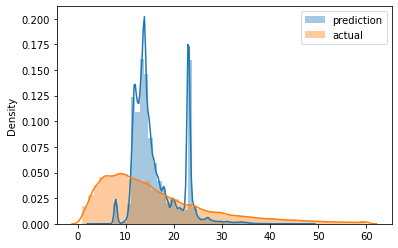

In [20]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [35]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.dropOff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.dropOff_datetime - df.pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]
    df.loc[df['PUlocationID'].isna(),'PUlocationID']=-1
    df.loc[df['DOlocationID'].isna(),'DOlocationID']=-1

    categorical = ['PUlocationID', 'DOlocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [36]:
#df_train = read_dataframe('./data/fhv_tripdata_2021-01.parquet')
df_val = read_dataframe('./data/fhv_tripdata_2021-02.parquet')

In [41]:
target = 'duration'
#y_train = df_train[target].values
y_val = df_val[target].values

In [42]:
y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

11.014283201773349